<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 17** | Arvores II | Exercício 3

Aluno [Marcio da Silva](https://github.com/marciolws)<br>
Data: 16 de setembro de 2024.

---

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [16]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics         import plot_confusion_matrix
from sklearn.metrics         import ConfusionMatrixDisplay
from sklearn.metrics         import confusion_matrix

%matplotlib inline

In [62]:
#Carregando bases de dados salvas da tarefa anterior.

X_train = pd.read_csv('/Users/marciolewis/Library/Mobile Documents/com~apple~CloudDocs/EBAC_EXERCICIOS/Módulo 17 - Arvore II/Exercicio 1/output/X_train.csv')

X_test = pd.read_csv('/Users/marciolewis/Library/Mobile Documents/com~apple~CloudDocs/EBAC_EXERCICIOS/Módulo 17 - Arvore II/Exercicio 1/output/X_test.csv')

y_train = pd.read_csv('/Users/marciolewis/Library/Mobile Documents/com~apple~CloudDocs/EBAC_EXERCICIOS/Módulo 17 - Arvore II/Exercicio 1/UCI HAR Dataset/train/y_train.txt', header=None)

y_test = pd.read_csv('/Users/marciolewis/Library/Mobile Documents/com~apple~CloudDocs/EBAC_EXERCICIOS/Módulo 17 - Arvore II/Exercicio 1/UCI HAR Dataset/test/y_test.txt', header=None)

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [65]:
# Árvore de classificação com todas as variáveis

clf = DecisionTreeClassifier(random_state=21, min_samples_leaf=20).fit(X_train, y_train)

In [66]:
#Retorna o gini das variáveis

variaveis = clf.feature_importances_

#Transformando o array em uma lista pois vou precisar do indice da variável e o valor dela

variaveis = variaveis.tolist()

#Dicionário que vai armazenar o indice da variável e o seu respectivo valor.

indice = {}

#Loop para preencher o dicionário

for i in variaveis:
    if i != 0.0:
        indice[variaveis.index(i)] = i

In [67]:
# As variáveis que apresentaram maior valor de gini foram as seguintes:

for i in indice:
    print(f'{X_train.columns[i]}: {indice[i]}')

Unnamed: 0: 0.010055202738773831
subject_train: 0.003842815858857412
10 tBodyAcc-max()-X: 0.0023314794197944917
23 tBodyAcc-entropy()-X: 5.4129882773159554e-05
38 tBodyAcc-correlation()-X,Y: 0.00637623591867831
41 tGravityAcc-mean()-X: 0.0020907361056637674
51 tGravityAcc-max()-Y: 0.008477710348358966
52 tGravityAcc-max()-Z: 0.003025478616607553
53 tGravityAcc-min()-X: 0.2566500743149311
54 tGravityAcc-min()-Y: 0.0021040148972037904
55 tGravityAcc-min()-Z: 0.0015613873616022614
57 tGravityAcc-energy()-X: 0.0004392746124066974
58 tGravityAcc-energy()-Y: 0.0207363670513145
59 tGravityAcc-energy()-Z: 0.00033552964892823823
68 tGravityAcc-arCoeff()-X,3: 0.0015835949463558732
72 tGravityAcc-arCoeff()-Y,3: 0.0030638833814848345
75 tGravityAcc-arCoeff()-Z,2: 0.10286881932742978
83 tBodyAccJerk-mean()-Z: 1.1473778397151106e-05
89 tBodyAccJerk-mad()-Z: 0.0010046257726737387
92 tBodyAccJerk-max()-Z: 2.42255770049158e-05
118 tBodyAccJerk-correlation()-X,Y: 0.0026069411081882012
130 tBodyGyro-max(

In [68]:
#Para determinar as três variáveis que apresentam o maior gini, farei uma copia do indice

indice_1 = indice.copy()

#Lista par armazenar as variáveis que apresentaram maior gini

var = []

for _ in range(3):
    n = (list(indice_1.keys())[list(indice_1.values()).index(max(indice_1.values()))])
    var.append(n)
    indice_1.pop(n)

In [69]:
#Print dos 3 maiores valores.

for _ in var:
    print(f'{X_train.columns[_]}: {indice[_]}')

53 tGravityAcc-min()-X: 0.2566500743149311
394 fBodyAccJerk-bandsEnergy()-1,24: 0.2153488338321681
560 angle(Y,gravityMean): 0.14127408216564105


In [70]:
var

[54, 395, 561]

In [71]:
# Antes de construir a árvore de decisão irei criar os dataframes apenas com as variáveis escolhidas.

X0_train = X_train.iloc[:,[54, 395, 561]]
X0_test = X_test.iloc[:,[54, 395, 561]]

In [72]:
X0_train

,53 tGravityAcc-min()-X,"394 fBodyAccJerk-bandsEnergy()-1,24","560 angle(Y,gravityMean)"
0,0.977436,-0.999981,0.179941
1,0.984520,-0.999974,0.180289
2,0.986770,-0.999909,0.180637
3,0.986821,-0.999927,0.181935
4,0.987434,-0.999975,0.185151
...,...,...,...
7347,0.920554,-0.724214,0.238604
7348,0.920554,-0.767363,0.252676
7349,0.933008,-0.757269,0.249145
7350,0.933008,-0.780800,0.246432


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [73]:
clf = DecisionTreeClassifier(random_state=21)
caminho = clf.cost_complexity_pruning_path(X0_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [74]:
#Garantindo que os ccp_alphas são únicos e positivos

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

In [75]:
grid_parametros = {'ccp_alpha':ccp_alphas[::10]}

In [76]:
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros, cv=15, verbose=100)
grid.fit(X0_train, y_train)

Fitting 15 folds for each of 28 candidates, totalling 420 fits
[CV 1/15; 1/28] START ccp_alpha=0.0.............................................
[CV 1/15; 1/28] END ..............ccp_alpha=0.0;, score=0.837 total time=   0.0s
[CV 2/15; 1/28] START ccp_alpha=0.0.............................................
[CV 2/15; 1/28] END ..............ccp_alpha=0.0;, score=0.752 total time=   0.0s
[CV 3/15; 1/28] START ccp_alpha=0.0.............................................
[CV 3/15; 1/28] END ..............ccp_alpha=0.0;, score=0.753 total time=   0.0s
[CV 4/15; 1/28] START ccp_alpha=0.0.............................................
[CV 4/15; 1/28] END ..............ccp_alpha=0.0;, score=0.810 total time=   0.0s
[CV 5/15; 1/28] START ccp_alpha=0.0.............................................
[CV 5/15; 1/28] END ..............ccp_alpha=0.0;, score=0.716 total time=   0.0s
[CV 6/15; 1/28] START ccp_alpha=0.0.............................................
[CV 6/15; 1/28] END ..............ccp_alpha=0.

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=21),
             param_grid={'ccp_alpha': array([0.        , 0.00011747, 0.00012594, 0.00013058, 0.00013239,
       0.00013761, 0.00016322, 0.00017229, 0.00019809, 0.00021763,
       0.0002267 , 0.00023803, 0.00024813, 0.00027013, 0.00028922,
       0.0003109 , 0.00032797, 0.00036008, 0.00040168, 0.00046134,
       0.00049782, 0.00057506, 0.00065301, 0.00087177, 0.00109014,
       0.00190094, 0.00326048, 0.10936372])},
             verbose=100)

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [77]:
# Árvores obtidas do modelo

resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023329,0.003185,0.004164,0.001200,0.000000,{'ccp_alpha': 0.0},0.837067,0.751527,0.753061,0.810204,...,0.702041,0.804082,0.826531,0.72449,0.810204,0.755102,0.783673,0.770532,0.043630,25
1,0.023003,0.001014,0.003830,0.000753,0.000117,{'ccp_alpha': 0.00011746958156098525},0.837067,0.751527,0.751020,0.812245,...,0.702041,0.804082,0.826531,0.72449,0.810204,0.755102,0.783673,0.770532,0.043814,25
2,0.029515,0.024215,0.003942,0.001166,0.000126,{'ccp_alpha': 0.00012594204650787894},0.837067,0.753564,0.751020,0.812245,...,0.697959,0.804082,0.826531,0.72449,0.812245,0.755102,0.783673,0.770668,0.044693,24
3,0.023166,0.001990,0.003876,0.000970,0.000131,{'ccp_alpha': 0.00013057671381936885},0.830957,0.753564,0.753061,0.812245,...,0.697959,0.804082,0.826531,0.72449,0.812245,0.755102,0.783673,0.770397,0.044004,27
4,0.023202,0.002168,0.003705,0.000600,0.000132,{'ccp_alpha': 0.0001323902792890824},0.837067,0.751527,0.753061,0.812245,...,0.697959,0.804082,0.826531,0.72449,0.812245,0.755102,0.791837,0.771076,0.044768,23


In [79]:
# Calculando a acurácia

print(f'O modelo teve uma acurácia de 78,70%')
grid.best_score_

O modelo teve uma acurácia de 78,70%


np.float64(0.7869989054685009)

In [82]:
#A modelagem com index 24 que obteve a melhor acurácia

grid.best_index_

np.int64(24)

In [81]:
#Obtendo o melhor ccp

melhor_ccp = resultados.iloc[grid.best_index_,4]

In [83]:
#Treinando a árvore com o melhor ccp

clf = DecisionTreeClassifier(random_state=21, ccp_alpha=melhor_ccp).fit(X0_train, y_train)

In [84]:
#A modelagem na base de teste obteve uma acurácia de 73.00%.

clf.score(X0_test, y_test)

0.7298948082796064

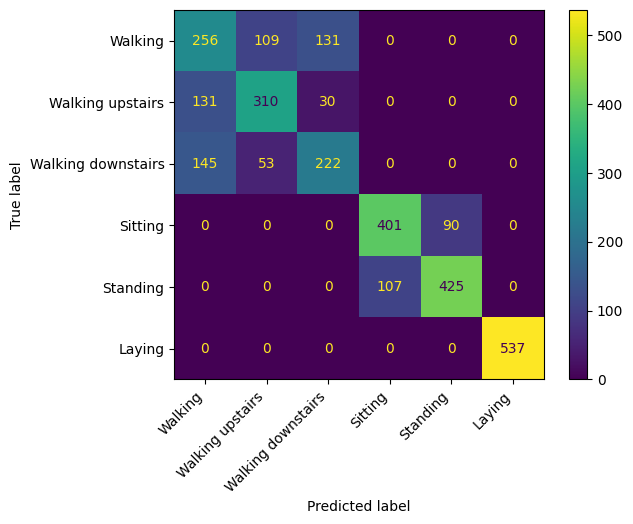

In [85]:
#Plot da matriz de confusão

ConfusionMatrixDisplay.from_estimator(clf, X0_test, y_test, display_labels=['Walking', 'Walking upstairs', 'Walking downstairs', 'Sitting', 'Standing', 'Laying'])
plt.xticks(rotation=45, ha='right')
plt.show()

### Insights:

A modelagem acertou todos os dados de Laying (descansando).

O modelo continua com o padrão visto anteriormente, grupo de movimento e grupo sem movimento.

Para o grupo que não tem movimento a acurácia é muito maior do que o grupo de movimento.

A acurácia no grupo de movimento, apesar de ser menor ainda apresenta uma boa acurácia, mais de 50%.

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [86]:
#A classe que apresentou mais erro é a walking

#A variável walking tem como resposta o valor 1

#Pegarei a y_test e a y_train e substituir os valores, quando y for 1 e continuará como 1, se ele for qualquer outro número ele será 0.

y0_test = []
y0_train = []

tamanho_test = len(y_test)
tamanho_train = len(y_train)

i=0

while i < tamanho_test:
    if y_test[0][i] == 1:
        y0_test.append(1)
    else:
        y0_test.append(0)
    i += 1

i=0

while i < tamanho_train:
    if y_train[0][i] == 1:
        y0_train.append(1)
    else:
        y0_train.append(0)
    i += 1

In [87]:
#Os passos a seguir são os mesmos apresentados acima, treinando o modelo

clf = DecisionTreeClassifier(random_state=21, max_depth=4, min_samples_leaf=20).fit(X_train, y0_train)

In [88]:
#Retorna o gini das variáveis

variaveis = clf.feature_importances_

#Transformando o array em uma lista pois vou precisar do indice da variável e o valor dela

variaveis = variaveis.tolist()

#Dicionário que vai armazenar o indice da variável e o seu respectivo valor.

indice = {}

#Loop para preencher o dicionário

for i in variaveis:
    if i != 0.0:
        indice[variaveis.index(i)] = i

In [89]:
#As variáveis que apresentaram maior valor de gini foram as seguintes:

for i in indice:
    print(f'{X_train.columns[i]}: {indice[i]}')

38 tBodyAcc-correlation()-X,Y: 0.028272924477529354
66 tGravityAcc-arCoeff()-X,1: 0.11302727574125722
67 tGravityAcc-arCoeff()-X,2: 0.014936282173856315
105 tBodyAccJerk-entropy()-Z: 0.023825611609820642
118 tBodyAccJerk-correlation()-X,Y: 0.016503030741602046
167 tBodyGyroJerk-mad()-X: 0.3521541806478686
185 tBodyGyroJerk-entropy()-Z: 0.0005051678494053574
210 tBodyAccMag-arCoeff()1: 0.00164022592670938
223 tGravityAccMag-arCoeff()1: 0.036619131587429125
248 tBodyGyroMag-entropy(): 0.025597629296321523
352 fBodyAccJerk-mad()-Y: 0.00311625040231918
449 fBodyGyro-maxInds-X: 0.030157061694510958
483 fBodyGyro-bandsEnergy()-1,16: 0.002906802379946259
504 fBodyAccMag-std(): 0.3507384254714239


In [90]:
#Para determinar as três variáveis que apresentam o maior gini

indice_1 = indice.copy()

#Lista par armazenar as variáveis que apresentaram maior gini

var = []

for _ in range(3):
    n = (list(indice_1.keys())[list(indice_1.values()).index(max(indice_1.values()))])
    var.append(n)
    indice_1.pop(n)

In [91]:
#Print dos 3 maiores valores.

for _ in var:
    print(f'{X_train.columns[_]}: {indice[_]}')

167 tBodyGyroJerk-mad()-X: 0.3521541806478686
504 fBodyAccMag-std(): 0.3507384254714239
66 tGravityAcc-arCoeff()-X,1: 0.11302727574125722


In [92]:
var

[168, 505, 67]

In [93]:
# Antes de construir a árvore de decisão irei criar os dataframes apenas com as variáveis escolhidas.

X1_train = X_train.iloc[:,[67, 168, 505]]
X1_test = X_test.iloc[:,[67, 168, 505]]

In [94]:
X1_test.head()

,"66 tGravityAcc-arCoeff()-X,1",167 tBodyGyroJerk-mad()-X,504 fBodyAccMag-std()
0,-0.430254,-0.910363,-0.711074
1,-0.509882,-0.968614,-0.959746
2,-0.294986,-0.983723,-0.983784
3,-0.343016,-0.983995,-0.982120
4,-0.481742,-0.988244,-0.978838


In [95]:
clf = DecisionTreeClassifier(random_state=21)
caminho = clf.cost_complexity_pruning_path(X1_train, y0_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [96]:
#Garantindo que os ccp_alphas são únicos e positivos

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

In [97]:
grid_parametros = {'ccp_alpha':ccp_alphas[::10]}

In [98]:
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros, cv=15, verbose=100)
grid.fit(X1_train, y0_train)

Fitting 15 folds for each of 9 candidates, totalling 135 fits
[CV 1/15; 1/9] START ccp_alpha=0.0..............................................
[CV 1/15; 1/9] END ...............ccp_alpha=0.0;, score=0.953 total time=   0.0s
[CV 2/15; 1/9] START ccp_alpha=0.0..............................................
[CV 2/15; 1/9] END ...............ccp_alpha=0.0;, score=0.933 total time=   0.0s
[CV 3/15; 1/9] START ccp_alpha=0.0..............................................
[CV 3/15; 1/9] END ...............ccp_alpha=0.0;, score=0.963 total time=   0.0s
[CV 4/15; 1/9] START ccp_alpha=0.0..............................................
[CV 4/15; 1/9] END ...............ccp_alpha=0.0;, score=0.902 total time=   0.0s
[CV 5/15; 1/9] START ccp_alpha=0.0..............................................
[CV 5/15; 1/9] END ...............ccp_alpha=0.0;, score=0.943 total time=   0.0s
[CV 6/15; 1/9] START ccp_alpha=0.0..............................................
[CV 6/15; 1/9] END ...............ccp_alpha=0.0

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=21),
             param_grid={'ccp_alpha': array([0.        , 0.0001263 , 0.00013832, 0.0001746 , 0.00020403,
       0.00024483, 0.00032775, 0.00057121, 0.0048025 ])},
             verbose=100)

In [100]:
#Calculando a acurácia

grid.best_score_

np.float64(0.9632777754686395)

In [102]:
#Obtendo o melhor ccp

melhor_ccp = resultados.iloc[grid.best_index_,4]

In [103]:
#Treinando a árvore com o melhor ccp

clf = DecisionTreeClassifier(random_state=21, ccp_alpha=melhor_ccp).fit(X1_train, y0_train)

In [104]:
#A modelagem na base de teste obteve uma acurácia de 95.90%.
clf.score(X1_test, y0_test)

0.9589412962334578

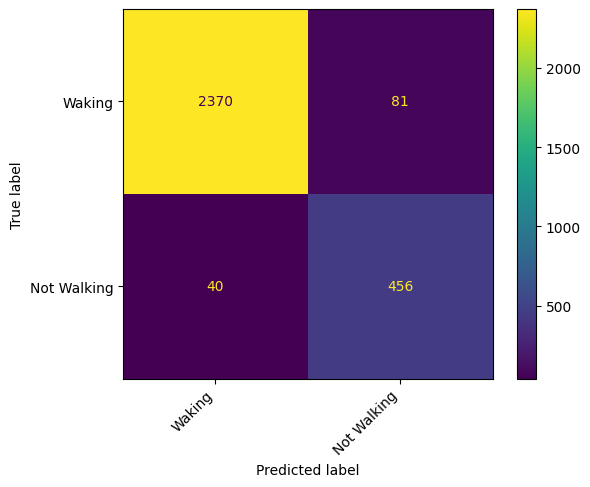

In [105]:
#Plot da matriz de confusão

ConfusionMatrixDisplay.from_estimator(clf, X1_test, y0_test, display_labels=['Waking', 'Not Walking'])
plt.xticks(rotation=45, ha='right')
plt.show()

### Insights:

Rodando o modelo para uma predição mais simples, andando ou não andando, o modelo obteve uma acurácia 95.90%.

Interessante como deixar a modelagem bem mais simples fez com que o valor da acurácia aumentasse tanto. Esse valor é tão elevado que me faz pensar que está com overffiting.